In [1]:
# TITLE - SHADOW REMOVAL (FOR TEXT/SCANNED IMAGES)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [3]:
# Steps involved
# 1) BACKGROUND EXTRACTION
# 2) BGR TO LAB CONVERSION
# 3) SHADOW DETECTION
# 4) SHADOW REMOVAL


(-0.5, 4159.5, 3119.5, -0.5)

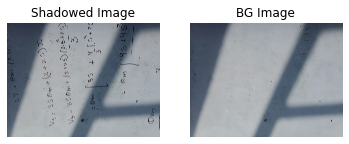

In [4]:
# 1) BACKGROUND EXTRACTION

I = cv2.imread('IMG1.jpg', -1) #BGR format, flag=-1 indicates return to the loaded image as it is, unchanged

#DOING SCALAR COLOR IMAGE PROCESSING
BG_Color_Planes = []
for i in range(3):
    Color_Plane = I[:,:,i]
    #Dilation with all 1's 7*7 window as structuring element
    Dilated_Image = cv2.dilate(Color_Plane, np.ones((7,7), np.uint16))
    #Median blur with window size 21*21
    BG_Color_Plane = cv2.medianBlur(Dilated_Image, 21) 
    #This gives some salt and pepper kind of noise
    BG_Color_Planes.append(BG_Color_Plane)
    

#merging background color planes
BG = cv2.merge(BG_Color_Planes)

#BGR TO RGB CONVERSION OF BACKGROUND IMAGE
BG_RGB = cv2.cvtColor(BG, cv2.COLOR_BGR2RGB)

#BGR TO RGB CONVERSION OF INPUT IMAGE
I_RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1) #to show two images side by side
plt.imshow(I_RGB) 
plt.title('Shadowed Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(BG_RGB)
plt.title('BG Image')
plt.axis('off')


(-0.5, 4159.5, 3119.5, -0.5)

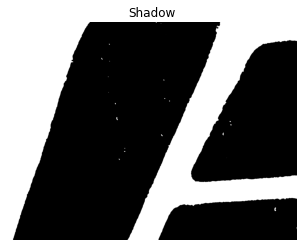

In [5]:
# 2&3) BGR TO LAB CONVERSION & SHADOW DETECTION

#extracting color planes
B = BG[:,:,0]
G = BG[:,:,1]
R = BG[:,:,2]
#BGR->XYZ->LAB color space transformations
#LAB CONVERSION INCLUDES COLOR STIMULUS AND ACHROMATIC REFERENCE ILLUMINANT RATIO
LAB = cv2.cvtColor(BG, cv2.COLOR_BGR2LAB)

#L - LIGHTNESS
#A,B - COLOR DIMENSIONS
#A - indicates red-green component of a color
#B - yellow and blue components are represented
L,A,B0 = cv2.split(LAB)

#Finding means and standard deviations for threshold calculation
mean_L = np.mean(L)
std_L = np.std(L)
mean_A = np.mean(A)
mean_B = np.mean(B0)
std_B = np.std(B0)

rows = len(L)
cols = len(L[0]) 

SHADOW = np.zeros([rows,cols])

#COMPARING EACH PIXEL WITH THRESHOLD, IF <= THEN SHADOW PIXEL
for i in range(rows):
    for j in range(cols):
        if(L[i,j] <= (mean_L - (std_L/5))):
            SHADOW[i,j] = 1
        else:
            SHADOW[i,j] = 0

plt.imshow(SHADOW,cmap='gray')
plt.title('Shadow') #white portion is shadow
plt.axis('off')


(-0.5, 4159.5, 3119.5, -0.5)

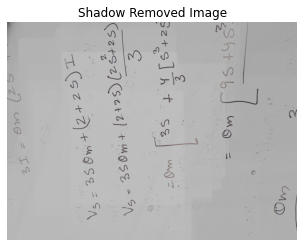

In [6]:
# 4) SHADOW REMOVAL

I_SHADOW_Planes = []
#multiplying the "1-shadow matrix" with Background
for j in range(3):
    Color_Plane = BG[:,:,j]
    Shadow_Color_Plane = np.multiply(Color_Plane,1-SHADOW)
    I_SHADOW_Planes.append(BG_Color_Plane)

#Calculating optimal window size for shadow removal
I_SHADOW = cv2.merge(I_SHADOW_Planes)
np.shape(I_SHADOW)
SHADOW_PIXELS = np.sum(SHADOW)
RATIO = SHADOW_PIXELS/(rows*cols)

#optimal window size
W_SIZE = np.int(1.2*RATIO*max(rows,cols))

I_out = I_SHADOW
#SHADOW REMOVAL by dilation, which will remove darker portions
for k in range(3):
    I_out[:,:,k] = cv2.dilate(I_out[:,:,k], np.ones((W_SIZE,W_SIZE), np.uint16)) #dilation with W_SIZE*W_SIZE window

#this I_out is shadow removed image from background

#text image is image - background
TEXT = I-BG

#shadow removed image
I_SHADOW_REMOVED = I_out+TEXT
I_SHADOW_REMOVED_RGB = cv2.cvtColor(I_SHADOW_REMOVED, cv2.COLOR_BGR2RGB)
cv2.imwrite('IMG1_SHADOW_REMOVED.png',I_SHADOW_REMOVED_RGB)

I_RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I_SHADOW_REMOVED_RGB) 
plt.title('Shadow Removed Image')
plt.axis('off')


(-0.5, 930.5, 474.5, -0.5)

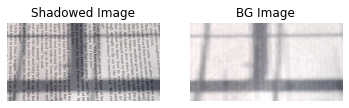

In [7]:
#ANOTHER EXAMPLE using IMG2.jpeg
# 1) BACKGROUND EXTRACTION

I = cv2.imread('IMG2.jpeg', -1) #BGR format, flag=-1 indicates return to the loaded image as it is, unchanged

#DOING SCALAR COLOR IMAGE PROCESSING
BG_Color_Planes = []
for i in range(3):
    Color_Plane = I[:,:,i]
    #Dilation with all 1's 7*7 window as structuring element
    Dilated_Image = cv2.dilate(Color_Plane, np.ones((7,7), np.uint16))
    #Median blur with window size 21*21
    BG_Color_Plane = cv2.medianBlur(Dilated_Image, 21) 
    #This gives some salt and pepper kind of noise
    BG_Color_Planes.append(BG_Color_Plane)
    

#merging background color planes
BG = cv2.merge(BG_Color_Planes)

#BGR TO RGB CONVERSION OF BACKGROUND IMAGE
BG_RGB = cv2.cvtColor(BG, cv2.COLOR_BGR2RGB)

#BGR TO RGB CONVERSION OF INPUT IMAGE
I_RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1) #to show two images side by side
plt.imshow(I_RGB) 
plt.title('Shadowed Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(BG_RGB)
plt.title('BG Image')
plt.axis('off')


In [8]:
# 2&3) BGR TO LAB CONVERSION & SHADOW DETECTION

#extracting color planes
B = BG[:,:,0]
G = BG[:,:,1]
R = BG[:,:,2]
#BGR->XYZ->LAB color space transformations
#LAB CONVERSION INCLUDES COLOR STIMULUS AND ACHROMATIC REFERENCE ILLUMINANT RATIO
LAB = cv2.cvtColor(BG, cv2.COLOR_BGR2LAB)

#L - LIGHTNESS
#A,B - COLOR DIMENSIONS
#A - indicates red-green component of a color
#B - yellow and blue components are represented
L,A,B0 = cv2.split(LAB)

#Finding means and standard deviations for threshold calculation
mean_L = np.mean(L)
std_L = np.std(L)
mean_A = np.mean(A)
mean_B = np.mean(B0)
std_B = np.std(B0)

rows = len(L)
cols = len(L[0]) 

SHADOW = np.zeros([rows,cols])

#COMPARING EACH PIXEL WITH THRESHOLD, IF <= THEN SHADOW PIXEL
for i in range(rows):
    for j in range(cols):
        if(L[i,j] <= (mean_L - (std_L/5))):
            SHADOW[i,j] = 1
        else:
            SHADOW[i,j] = 0


(-0.5, 930.5, 474.5, -0.5)

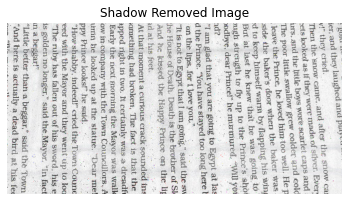

In [9]:
# 4) SHADOW REMOVAL

I_SHADOW_Planes = []
#multiplying the "1-shadow matrix" with Background
for j in range(3):
    Color_Plane = BG[:,:,j]
    Shadow_Color_Plane = np.multiply(Color_Plane,1-SHADOW)
    I_SHADOW_Planes.append(BG_Color_Plane)

#Calculating optimal window size for shadow removal
I_SHADOW = cv2.merge(I_SHADOW_Planes)
np.shape(I_SHADOW)
SHADOW_PIXELS = np.sum(SHADOW)
RATIO = SHADOW_PIXELS/(rows*cols)

#optimal window size
W_SIZE = np.int(1.2*RATIO*max(rows,cols))

I_out = I_SHADOW
#SHADOW REMOVAL by dilation, which will remove darker portions
for k in range(3):
    I_out[:,:,k] = cv2.dilate(I_out[:,:,k], np.ones((W_SIZE,W_SIZE), np.uint16)) #dilation with W_SIZE*W_SIZE window

#this I_out is shadow removed image from background

#text image is image - background
TEXT = I-BG

#shadow removed image
I_SHADOW_REMOVED = I_out+TEXT
I_SHADOW_REMOVED_RGB = cv2.cvtColor(I_SHADOW_REMOVED, cv2.COLOR_BGR2RGB)
cv2.imwrite('IMG2_SHADOW_REMOVED.png',I_SHADOW_REMOVED_RGB)

I_RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I_SHADOW_REMOVED_RGB) 
plt.title('Shadow Removed Image')
plt.axis('off')
